# Reddit users analysis

## Intro

From https://github.com/hammer-of-thor/reddit-suspicious-accounts:

On April 11, 2018 Reddit released its 2017 transparency report, along with a list of 944 accounts that the site's administrators suspect belonged to the Russian Internet Research Agency.

/u/spez, April 2018:
> To give you more insight into our findings, here is a link to all 944 accounts. We have decided to keep them visible for now, but after a period of time the accounts and their content will be removed from Reddit. We are doing this to allow moderators, investigators, and all of you to see their account histories for yourselves.

This data has been harvested and made available by: https://github.com/ALCC01

So this is content flagged by reddit as having been created by RIRA agents. As far as I know, no evidence or reasoning for this has been given. It is important to note that this is therefore a heavily biased dataset with unknown underlying rulesets.

### Goal

What I am interested in, is why these users are different, and how can learn from these users what makes them different, so that we, as a community can become more aware. According to /u/spez, this:
>There were a number of signals: suspicious creation patterns, usage patterns (account sharing), voting collaboration, etc. We also corroborated our findings with public lists from other companies (e.g. Twitter). 

is what made these users stand out. Now, this is a bit vague, and I understand that Reddit doesn't necessarily want to show their methods. The goal of this analysis is not to reverse engineer Reddit's methods, it is, instead; to see what makes them stand out, what the goal of these users could have been, what kind of influence they wanted to exert, and how some users in this list are different from other users in this list.

The more technical goal is the following; enrich this data, shape it for proper visualization and visualise it.

Notepad:
* Top and bottom users.
* Interconnected users.

## Plan of Action

I want to end up with the following end products:
* Network diagram, to try to see if there is any suspicious connection
* Root source of karma
* What makes these accounts similar to each other, as opposed to some random accounts

## Data wrangling

In [101]:
%matplotlib inline
import pandas as pd

users = pd.read_csv(r'F:\CloudStation\Educational\Git\reddit-suspicious-accounts\data\users.csv')
comments = pd.read_csv(r'F:\CloudStation\Educational\Git\reddit-suspicious-accounts\data\comments.csv')
submissions = pd.read_csv(r'F:\CloudStation\Educational\Git\reddit-suspicious-accounts\data\submissions.csv')

In [102]:
print(users.dtypes)
users['created'] = pd.to_datetime(users['created_utc'], unit='s')
users['has_verified_email'] = users['has_verified_email'].astype('bool')
del users['created_utc']
print(users.dtypes)

fullname               object
comment_karma           int64
created_utc           float64
has_subscribed           bool
has_verified_email     object
icon_img               object
id                     object
is_employee              bool
is_gold                  bool
is_mod                   bool
link_karma              int64
name                   object
dtype: object
fullname                      object
comment_karma                  int64
has_subscribed                  bool
has_verified_email              bool
icon_img                      object
id                            object
is_employee                     bool
is_gold                         bool
is_mod                          bool
link_karma                     int64
name                          object
Created               datetime64[ns]
dtype: object


In [103]:
users.head()

,fullname,comment_karma,has_subscribed,has_verified_email,icon_img,id,is_employee,is_gold,is_mod,link_karma,name,Created
0,t2_z919g,-7,True,True,https://www.redditstatic.com/avatars/avatar_de...,z919g,False,False,False,1,BlackToLive,2016-07-05 01:13:18
1,t2_nhk4d,-5,False,False,https://www.redditstatic.com/avatars/avatar_de...,nhk4d,False,False,False,1,FaurnFlamebreaker,2015-05-15 09:44:41
2,t2_r8rca,-4,True,False,https://www.redditstatic.com/avatars/avatar_de...,r8rca,False,False,False,1,Bill_Jonson,2015-10-17 03:55:40
3,t2_nhml3,0,False,False,https://www.redditstatic.com/avatars/avatar_de...,nhml3,False,False,False,1,PurebringerOghmagra,2015-05-15 12:38:42
4,t2_qidqv,-2,True,False,https://www.redditstatic.com/avatars/avatar_de...,qidqv,False,False,False,1,Clawisma,2015-09-16 17:22:29


In [104]:
comments.head()

,fullname,archived,author.name,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,link_url,name,num_comments,parent_id,permalink,score,stickied,subreddit.display_name_prefixed,subreddit_type,ups
0,t1_d687zh5,True,BlackToLive,NaN,"A hard look at training and tactics"" = They wi...",0,1.470604e+09,NaN,0,False,...,http://www.reuters.com/article/us-usa-police-c...,t1_d687zh5,119,t3_4wkn7m,/r/Bad_Cop_No_Donut/comments/4wkn7m/chicago_po...,1,False,r/Bad_Cop_No_Donut,public,1
1,t1_d5wqzhx,True,BlackToLive,NaN,They deserve all of the hate,0,1.469847e+09,NaN,0,False,...,http://reason.com/blog/2016/07/28/pine-bluff-c...,t1_d5wqzhx,96,t3_4v5xpc,/r/Bad_Cop_No_Donut/comments/4v5xpc/arkansas_p...,1,False,r/Bad_Cop_No_Donut,public,1
2,t1_d5qvqfw,True,BlackToLive,NaN,"I guess that's what they mean when say ""I don'...",0,1.469498e+09,NaN,0,False,...,http://countercurrentnews.com/2016/07/no-charg...,t1_d5qvqfw,210,t1_d5qeyrw,/r/Bad_Cop_No_Donut/comments/4uiezg/no_charges...,1,False,r/Bad_Cop_No_Donut,public,1
3,t1_d5quz9y,True,BlackToLive,NaN,"It's never too late for them, It's never too c...",0,1.469497e+09,NaN,0,False,...,http://www.opposingviews.com/i/society/police-...,t1_d5quz9y,18,t3_4uicjv,/r/Bad_Cop_No_Donut/comments/4uicjv/police_off...,1,False,r/Bad_Cop_No_Donut,public,1
4,t1_d565ls1,True,BlackToLive,NaN,https://petitions.whitehouse.gov//petition/pet...,0,1.468114e+09,NaN,0,False,...,http://www.thelibertyconservative.com/favor-po...,t1_d565ls1,12,t1_d55o1gr,/r/Good_Cop_Free_Donut/comments/4s0s3j/you_can...,1,False,r/Good_Cop_Free_Donut,public,1


In [105]:
submissions.head()

,fullname,archived,author.name,author_flair_text,brand_safe,created_utc,distinguished,domain,downs,edited,...,selftext,spoiler,stickied,subreddit_name_prefixed,subreddit_type,subreddit_subscribers,title,ups,url,whitelist_status
0,t3_8b7ryg,False,reddit,NaN,False,1.523369e+09,admin,self.reddit,0,False,...,NaN,False,False,u/reddit,user,0,This account is banned and is temporarily pres...,325,https://www.reddit.com/r/u_reddit/comments/8b7...,NaN
1,t3_511r3a,True,BlackToLive,NaN,False,1.472951e+09,NaN,twitter.com,0,False,...,NaN,False,False,r/Bad_Cop_No_Donut,public,125644,Cops really be trying hard to take non-black p...,1,https://twitter.com/gloed_up/status/7707843365...,promo_adult
2,t3_4xyikx,True,BlackToLive,NaN,True,1.471337e+09,NaN,abcnews.go.com,0,False,...,NaN,False,False,r/news,public,15884252,Milwaukee Police Chief: Some Arrests Made but ...,1,http://abcnews.go.com/US/wireStory/latest-poli...,all_ads
3,t3_4va15u,True,BlackToLive,NaN,False,1.469844e+09,NaN,blacktolive.org,0,False,...,NaN,False,False,r/BlackLivesMatter,public,6676,We Want Real Equality,1,http://blacktolive.org/opinion/we-want-real-eq...,promo_all
4,t3_4v9u9s,True,BlackToLive,NaN,False,1.469841e+09,NaN,blacktolive.org,0,False,...,NaN,False,False,r/Bad_Cop_No_Donut,public,125644,Three Remaining Cops In The Freddie Gray Case ...,1,http://blacktolive.org/news/crime/three-remain...,promo_adult


All looks good. Now let's inspect our users further.

### User data only

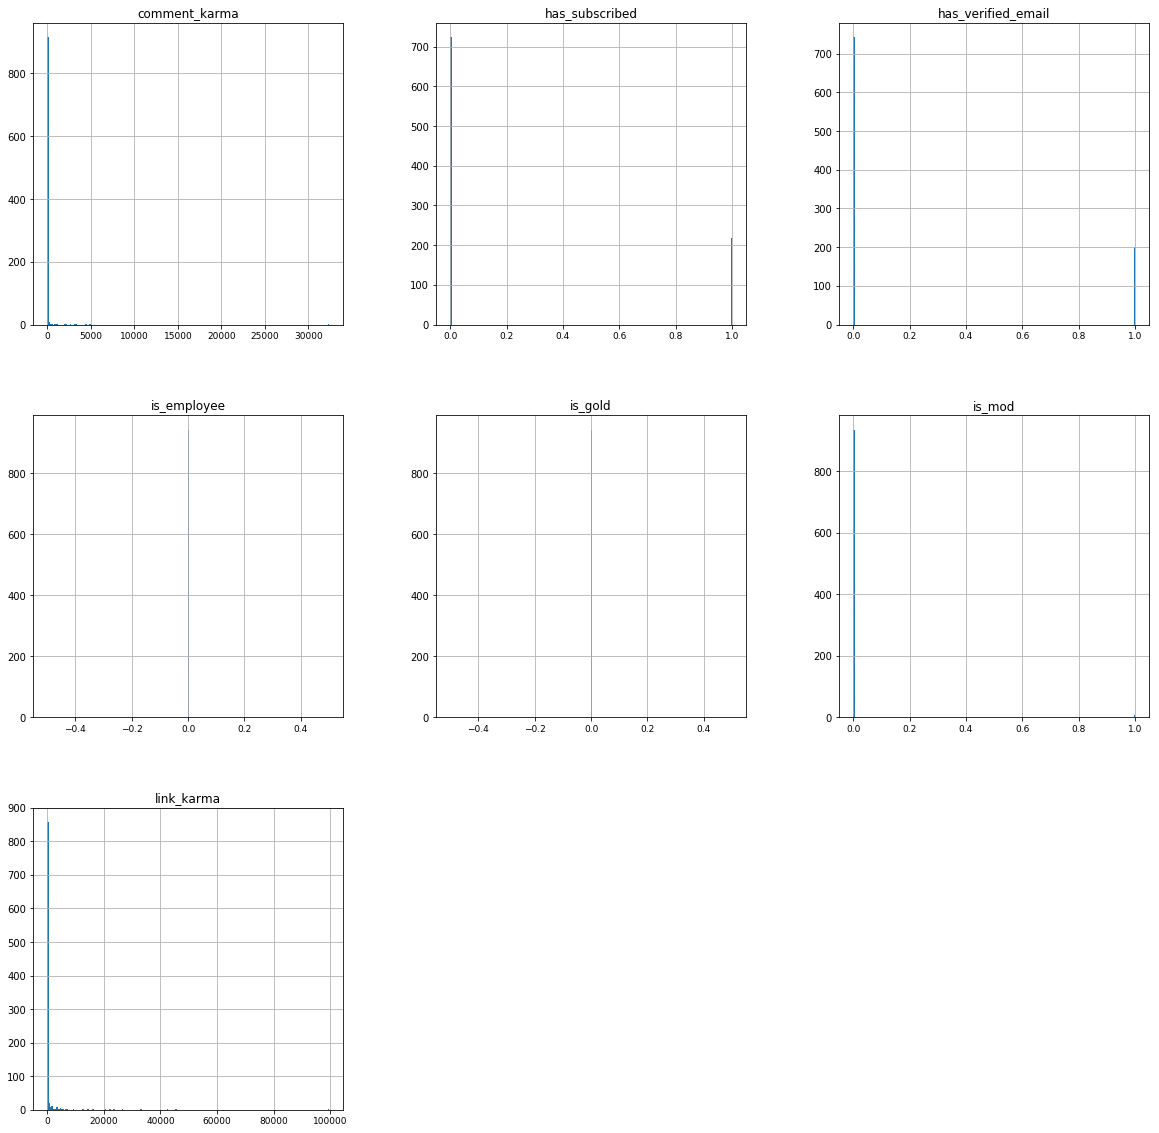

In [106]:
from matplotlib import pyplot as plt
hist = users.hist(figsize=[20,20],xlabelsize=9, bins=200)

In [112]:
users.describe(include=['bool','int64'])

,comment_karma,has_subscribed,has_verified_email,is_employee,is_gold,is_mod,link_karma
count,943.000000,943,943,943,943,943,943.000000
unique,NaN,2,2,1,1,2,NaN
top,NaN,False,False,False,False,False,NaN
freq,NaN,724,743,943,943,936,NaN
mean,70.302227,NaN,NaN,NaN,NaN,NaN,629.102863
std,1095.057591,NaN,NaN,NaN,NaN,NaN,4452.024077
min,-20.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
50%,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,0.000000,NaN,NaN,NaN,NaN,NaN,7.000000


What is immediately obvious, is how heavily skewed these distributions are. Some of these skews make sense more than others:
* None of the found accounts is an employee. This was expected.
* None of the found accounts have a gold status. Seeing as the sample is quite big, this seems to be characteristic of this group. 

For most of these statistics to mean anything, it would be good to compare this to the general population.

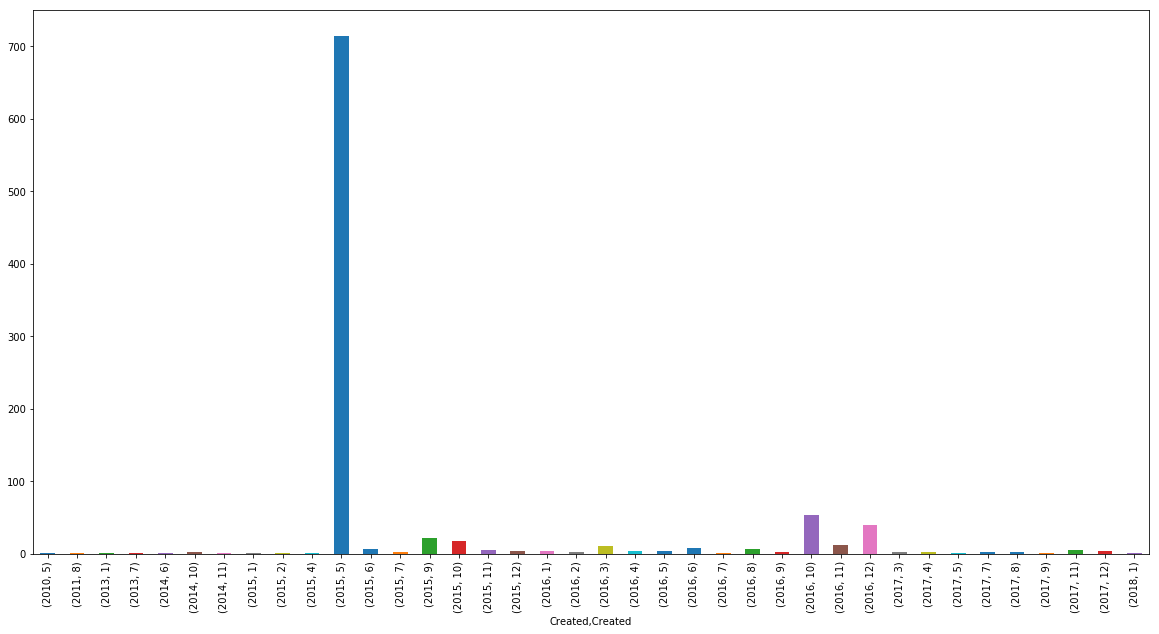

In [107]:
from datetime import date
users.groupby([users["Created"].dt.year, users["Created"].dt.month]).size().plot(kind="bar",legend=False,figsize=[20,10])

This is a very interesting observation. Most accounts seem to be overwhelmingly created in May 2015. With smaller spikes around November 2016, which, coincidentally, lies around the period of the American Presidential Elections. We should be aware though, that we might be seeing this because of Reddit's collection methods.

Let's make this into one big dataset for ease.

In [72]:
for i, row in users.iterrows():
    print(i)
    row['Test'] = i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [73]:
users

,fullname,comment_karma,created_utc,has_subscribed,has_verified_email,icon_img,id,is_employee,is_gold,is_mod,link_karma,name,Created,Created_Num
0,t2_z919g,-7,1.467681e+09,True,True,https://www.redditstatic.com/avatars/avatar_de...,z919g,False,False,False,1,BlackToLive,2016-07-05 01:13:18,0 2016-07\n1 2015-05\n2 2015-10\n3...
1,t2_nhk4d,-5,1.431683e+09,False,False,https://www.redditstatic.com/avatars/avatar_de...,nhk4d,False,False,False,1,FaurnFlamebreaker,2015-05-15 09:44:41,0 2016-07\n1 2015-05\n2 2015-10\n3...
2,t2_r8rca,-4,1.445054e+09,True,False,https://www.redditstatic.com/avatars/avatar_de...,r8rca,False,False,False,1,Bill_Jonson,2015-10-17 03:55:40,0 2016-07\n1 2015-05\n2 2015-10\n3...
3,t2_nhml3,0,1.431694e+09,False,False,https://www.redditstatic.com/avatars/avatar_de...,nhml3,False,False,False,1,PurebringerOghmagra,2015-05-15 12:38:42,0 2016-07\n1 2015-05\n2 2015-10\n3...
4,t2_qidqv,-2,1.442424e+09,True,False,https://www.redditstatic.com/avatars/avatar_de...,qidqv,False,False,False,1,Clawisma,2015-09-16 17:22:29,0 2016-07\n1 2015-05\n2 2015-10\n3...
5,t2_xgy8f,-1,1.461679e+09,False,False,https://www.redditstatic.com/avatars/avatar_de...,xgy8f,False,False,False,1,jake_browny,2016-04-26 14:04:53,0 2016-07\n1 2015-05\n2 2015-10\n3...
6,t2_13cw7p,0,1.481028e+09,True,True,https://www.redditstatic.com/avatars/avatar_de...,13cw7p,False,False,False,1,Georgie_Felix,2016-12-06 12:46:22,0 2016-07\n1 2015-05\n2 2015-10\n3...
7,t2_5rkee,0,1.314828e+09,False,False,https://www.redditstatic.com/avatars/avatar_de...,5rkee,False,False,False,1,George_BENTLEY,2011-08-31 21:52:51,0 2016-07\n1 2015-05\n2 2015-10\n3...
8,t2_axcz1hx,0,1.503044e+09,True,True,https://www.redditstatic.com/avatars/avatar_de...,axcz1hx,False,False,False,1,rico_penya,2017-08-18 08:10:07,0 2016-07\n1 2015-05\n2 2015-10\n3...
9,t2_16pqk5,0,1.491140e+09,True,False,https://www.redditstatic.com/avatars/avatar_de...,16pqk5,False,False,False,1,Leprechaun_yura,2017-04-02 13:31:24,0 2016-07\n1 2015-05\n2 2015-10\n3...
